# Исследование надёжности заёмщиков

Вопрос надежности заемщиков - один из ключевых вопросов для банковской сферы, особенно в современных условиях, характеризующихся высокой степенью нестабильности. Для проведения анализа обратился кредитный отдел коммерческого банка. Для анализа была предоставлена статистика платёжеспособности клиентов.  
Цель анализа: определить влияние семейного положения и количества детей клиента на факт погашения кредита в срок. 

Результаты исследования будут использоваться для корректировки текущих программ кредитования и для построении модели **кредитного скоринга**, которая позволит автоматически рассчитывать потенциальную платежеспособность заемщиков.

## Первичный анализ данных

In [1]:
# импорт библиотек для работы с данными
import pandas as pd
import numpy as np
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

In [2]:
debt_data = pd.read_csv('/datasets/data.csv') # сохраняем данные в переменную

In [3]:
# визуальная оценка данных 
debt_data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
# визуальная оценка максимальных значений по столбцу total_income
debt_data.sort_values(by='total_income', ascending=False).head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12412,0,-1477.438114,44,высшее,0,женат / замужем,0,M,компаньон,0,2.265604e+06,ремонт жилью
19606,1,-2577.664662,39,высшее,0,женат / замужем,0,M,компаньон,1,2.200852e+06,строительство недвижимости
9169,1,-5248.554336,35,среднее,1,гражданский брак,1,M,сотрудник,0,1.726276e+06,дополнительное образование
20809,0,-4719.273476,61,среднее,1,Не женат / не замужем,4,F,сотрудник,0,1.715018e+06,покупка жилья для семьи
17178,0,-5734.127087,42,высшее,0,гражданский брак,1,M,компаньон,0,1.711309e+06,сыграть свадьбу
17503,0,-2285.476482,43,среднее,1,женат / замужем,0,M,компаньон,0,1.597613e+06,операции с недвижимостью
18368,1,-333.935516,41,ВЫСШЕЕ,0,гражданский брак,1,M,компаньон,0,1.551153e+06,свадьба
18353,1,-3173.282035,41,высшее,0,Не женат / не замужем,4,F,компаньон,0,1.427934e+06,автомобиль
15268,1,-10207.448165,64,высшее,0,в разводе,3,M,компаньон,0,1.350246e+06,жилье
11071,1,-1851.200013,36,высшее,0,гражданский брак,1,F,сотрудник,0,1.286281e+06,покупка коммерческой недвижимости


In [5]:
# получаем общую информацию о данных
debt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**
Для анализа предоставлен массив данных по платежеспособности заемщиков банка. Всего в таблице 12 столбцов и 21525 записей.
Для данных в каждом столбцк выбран соответствующий им тип данных. Все столбцы имеют корректное наименование.

По результатам общего анализа данных выявлено, что часть данных в таблице указана некорректна. А именно:
* В столбцах days_employed - трудовой стаж и total_income - уровень дохода имеются пропущенные занчения. Для корректного использования данных в этих столбца необходимо будет заполнить пустые значения.
* Отсутствует единый шаблон для заполнения столбцов education - уровень образования и purpose - цель кредита. Например цель кредита "на проведение свадьбы" и "сыграть свадьбу" относятся к одной категорииб но записаны по разному. Для проведения корректного категориального анализа требуется привести данные к единому шаблону.
* Помимо пропусков в столбце days_employed имеются отрицательные значения, что расходится со здравым смыслом т.к. стаж человека не может быть меньше 0.
* В столбце total_income при визуальном анализе данных видны непонятные для человеческого понимания значения дохода. Необходимо будет проверить влияет ли вид данных на результаты анализа и привести данные к понятному для чтения формату.

Во время общей проверки данных явные дубликаты строк не выявлены, но необходимо будет провести дополнительную проверку данных на наличие дубликатов.

Предварительно можно сказать, что данных достаточно для проверки выдвинутых гипотез, но требуется сначала устранть выявленные замечания и провести дополнительные проверки на корректность данных.

## Предобработка данных

### 1. Обработка пропусков

In [6]:
# подсчет количества пропущенных значений в данных
total_rows = debt_data['total_income'].count()
total_missing = debt_data['total_income'].isna().sum()
print('Количество пропущенных значений в данных: {}, что составляет {:.2%} от всей совокупности данных'.format(total_missing, total_missing / total_rows))

Количество пропущенных значений в данных: 2174, что составляет 11.23% от всей совокупности данных


Пропущенные данные составляют более 10% выборки. Исключение этих данных с большой вероятностью может привести к искажению результатов анализа. Следовательно пропуски необходимо заполнить. Т.к. данные в столбцах с пропусками количественные, их можно заполнить либо средним значением по столбцу, либо медианным значением. Ниже представлен анализ, позволяющий определить как из значений корректно использовать для заполнения пропусков.

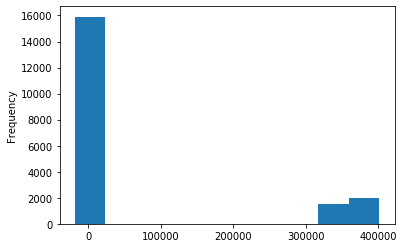

In [7]:
# гистограмма распределения дней трудового стажа
debt_data['days_employed'].plot(kind='hist')

In [8]:
# устранение отрицательных значений в столбце с днём трудового стажа
debt_data['days_employed'] = debt_data['days_employed'].abs()
debt_data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


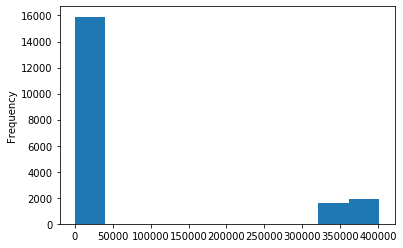

In [9]:
# гистограмма распределения дней трудового стажа
debt_data['days_employed'].plot(kind='hist')

После устранения отрицательных значений как и на предыдущей гистограмме видно, что около 3,5 тысяч записей имеют трудовой стаж существенно превышающий трудовой стаж в остальных наблюдениях. Данные значения не могут быть исключены из выборки т.к. составляют более 10% выборки. Наличие такого большого количества выбросов не позволяет использовать для заполнения пропущенных значений среднюю величину трудового стажа по выборке. Поэтому для заполнения пропущенных значений будет использоваться медиана.

In [10]:
# Расчет медианого значения для трудового стажа
days_employed_median = debt_data['days_employed'].median()
print('Медианное значение трудового стажа: {:.2f} дней,'.format(days_employed_median), 'или {:.2f} лет.'.format(days_employed_median / 365))

Медианное значение трудового стажа: 2194.22 дней, или 6.01 лет.


Медианное значение по всей выборке составляет 6 лет,ч то достаточно мало, т.к. в выборке есть пенсионеры и люди предпенсионного возраста. Кроме этого существует несколько типов занятости, для которых трудовой стаж может существенно отличаться. Рассчитаем медианные значения по каждому типу занятости.

In [11]:
# определяем типы занятости
income_type_list = debt_data['income_type'].unique().tolist()
# рассчитываем и выводим медианное значение трудового стажа в зависимости от типа занятости.
for inc_type in income_type_list:
    print('Медианное значение трудового стажа по категории {} составляет {:.2f} дней.'.format(inc_type, debt_data[debt_data['income_type'] == inc_type]['days_employed'].median()))

Медианное значение трудового стажа по категории сотрудник составляет 1574.20 дней.
Медианное значение трудового стажа по категории пенсионер составляет 365213.31 дней.
Медианное значение трудового стажа по категории компаньон составляет 1547.38 дней.
Медианное значение трудового стажа по категории госслужащий составляет 2689.37 дней.
Медианное значение трудового стажа по категории безработный составляет 366413.65 дней.
Медианное значение трудового стажа по категории предприниматель составляет 520.85 дней.
Медианное значение трудового стажа по категории студент составляет 578.75 дней.
Медианное значение трудового стажа по категории в декрете составляет 3296.76 дней.


Гипотеза о различии показателя трудового стажа в заивисмости от типа занятости подтвердилась. Пропуски в столбце с трудовым стажем корректно будет заполнить медианными значениями в зависимости от типа занятости.
Остаются две проблемные категории, по которым значения трудового стажа сильно завышены - это пенсионеры и безработные.
Т.к. безработным может стать участник любой другой категории, то для исправления значений по безработным будем использовать медианное значение по всей выборке.
Для пенсионеров рассчитаем медианное значение трудового стажа для людей предпенсионного возраста: для женщин старше 50 лет и для мужчин старше 55 лет.

In [12]:
# рассчитываем медианное значение трудового стажа для женщин старше 50 лет и для мужчин старше 55 лет
old_people_days_employed_median = debt_data[((debt_data['dob_years'] >= 50) & (debt_data['gender'] == 'F') | (debt_data['dob_years'] >= 55) & (debt_data['gender'] == 'M')) & debt_data['days_employed'] < 300000]['days_employed'].median()
print('Медианное значение трудового стажа для пожилых людей составляет {:.2f} дня.'.format(old_people_days_employed_median))

Медианное значение трудового стажа для пожилых людей составляет 2194.22 дня.


По результатам проведенного анализа были получены значения, которые будут заменять пропуски и неадекватно большие значения трудового стажа. Замена будет производиться для каждого типа занятости:
* для категории "сотрудник" - **1574.20** дней;
* для категории "компаньон" - **1547.38** дней;
* для категории "пенсионер" - **2194.22** дней;
* для категории "госслужащий" - **2689.37** дней;
* для категории "предприниматель" - **520.85** дней;
* для категории "безработные" - **2194.22** дней;
* для категории "студент" - **578.75** дней;
* для категории "в декрете" - **3296.76** дней.

In [13]:
# определим категории источнико доходов, для которых имеются пропуски в столбце "трудовой стаж" 
debt_data[debt_data['days_employed'].isna()]['income_type'].unique().tolist()

['пенсионер', 'госслужащий', 'компаньон', 'сотрудник', 'предприниматель']

In [14]:
# заполним пропуски данных в столбце days_employed
debt_data.loc[(debt_data.income_type == 'пенсионер') & (pd.isna(debt_data.days_employed)),'days_employed'] = 2194.22
debt_data.loc[(debt_data.income_type == 'госслужащий') & (pd.isna(debt_data.days_employed)),'days_employed'] = 2689.37
debt_data.loc[(debt_data.income_type == 'компаньон') & (pd.isna(debt_data.days_employed)),'days_employed'] = 1547.38
debt_data.loc[(debt_data.income_type == 'сотрудник') & (pd.isna(debt_data.days_employed)),'days_employed'] = 1574.20
debt_data.loc[(debt_data.income_type == 'предприниматель') & (pd.isna(debt_data.days_employed)),'days_employed'] = 520.85

In [15]:
# замена аномально больших значений трудового стажа на медианные значения
debt_data.loc[(debt_data.income_type == 'пенсионер') & (debt_data.days_employed > 300000), 'days_employed'] = 2194.22
debt_data.loc[(debt_data.income_type == 'безработный') & (debt_data.days_employed > 300000), 'days_employed'] = 2194.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


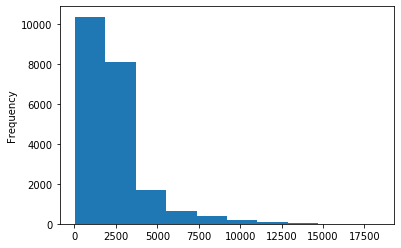

In [16]:
# проверка устранения некорректных и пустых значений в столбце days_employed
debt_data.info()
debt_data['days_employed'].plot(kind='hist')

Пропуски в значениях стажа устранены. Но остаются пропуски в значениях ежемесячного дохода. Проанализируем распределение значений дохода в исходных данных.

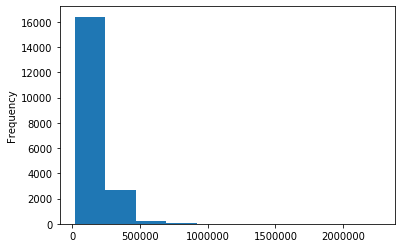

In [17]:
# Гистограмма распределения значений ежемесячного дохода
debt_data['total_income'].plot(kind='hist')

Значения ежемесячного дохода сильно смещены влево, поэтому расчет среднего значения для заполнения пропусков даст завышенное значение. Так же как и для заполнения пропущенных значений стажа работы для заполнения пропущенных значений ежемесячного дохода будем использовать медианное значение

In [18]:
# расчет медианного значения ежемесячного дохода
total_income_median = debt_data['total_income'].median()
print('Медианное значение ежемясячного дохода составляет {:.2f} рублей.'.format(total_income_median))

Медианное значение ежемясячного дохода составляет 145017.94 рублей.


In [19]:
# заполним пропуски в значениях ежемясячного дохода медианным значением
debt_data.loc[debt_data.total_income.isna(), 'total_income'] = total_income_median

In [20]:
# проверка отсутствия пропущенных значений
debt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

В исходных данных были пропуски значений в столбцах со стажем (days_employed) и с уровнем ежемесячного дохода (total_income). Т.к. остальные данные в строках были заполнены вероятнее всего, что при предоставлении данных банку поля с величиной стажа и уровнем дохода являлись необязательными и клиенты не стали их заполнять. Данные по величине стажа распределены неравномерно - большая часть клиентов имеет небольшой стаж. Поэтому для заполнения пропусков было выбрано медианное значение. Учитывая, что клиенты имеют разный тип занятости, медианные значения рассчитывались по каждому типу занятости отдельно и пропуски заполнялись с учетом типа занятости клиента.
Так же в процессе анализа были выявлены аномально высокие показатели стажа, которые так же были заменены медианными значениями.
Данные об уровен ежемесячного дохода так же распределены неравномерно. Пропуски в этом столбце заполнены медианным значением ежемесячного дохода. 

### 2. Замена типа данных

In [21]:
# замена вещественного типа в столбце days_employed  и total_income на целочисленный
debt_data['days_employed'] = debt_data['days_employed'].astype('int')
debt_data['total_income'] = debt_data['total_income'].astype('int')
debt_data.info()
debt_data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,2194,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


**Вывод**

В исходных данных для трудового стажа и ежемесячного дохода определен вещественный тип данных. Маловероятно, что при вводе пользователи указывали тысячные доли дней стажа и дохода. Более логичным является преобразование значений данных столбцов к целочисленному типу. Данные были преобразованы с помощью метода **astype()** т.к. изначально они уже являлись числовыми, требовалось поменять только тип.
После преобразования значения стали более наглядными и понятными.

### 3. Обработка дубликатов

In [22]:
# поиск полных дубликатов с помощью метода duplicated()
print('Количество полных дубликатов в таблице: {:.0f}'.format(debt_data.duplicated().sum()))

Количество полных дубликатов в таблице: 54


In [23]:
# удаляем полные дубликаты с помощью метода drop_duplicates()
debt_data = debt_data.drop_duplicates().reset_index(drop=True)
print('Количество полных дубликатов в таблице: {:.0f}'.format(debt_data.duplicated().sum()))

Количество полных дубликатов в таблице: 0


Помимо полных дубликатов в данных так же присутствовали значения, которые являются одинаковыми, но написаны в разном регистре, например столбец education. Проведем поиск таких значений.

In [24]:
# поиск дубликатов в столбце education
debt_data['education'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [25]:
# устраним дубликаты в столбце education приведя все значения к нижнему регистру
debt_data['education'] = debt_data['education'].str.lower()
debt_data['education'].value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [26]:
# поиск полных дубликатов после удаления дубликатов в столбце education
print('Количество полных дубликатов в таблице: {:.0f}'.format(debt_data.duplicated().sum()))

Количество полных дубликатов в таблице: 17


In [27]:
# удаляем полные дубликаты с помощью метода drop_duplicates()
debt_data = debt_data.drop_duplicates().reset_index(drop=True)
print('Количество полных дубликатов в таблице: {:.0f}'.format(debt_data.duplicated().sum()))

Количество полных дубликатов в таблице: 0


In [28]:
# проведем проверку других столбцов, в которых потенциально могут быть дубликаты
debt_data['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [29]:
debt_data['gender'].value_counts()

F      14174
M       7279
XNA        1
Name: gender, dtype: int64

In [30]:
debt_data['income_type'].value_counts()

сотрудник          11084
компаньон           5078
пенсионер           3829
госслужащий         1457
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [31]:
debt_data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

В столбце family_status и income_type дубликатов не обнаружено. В столбце purpose есть много похожих категорий, но для их объединения будет в дальнейшем использована лемматизация. В столбце gender выявлено одна запись с неопределенным полом. Т.к. это запись единственная её можно удалить, на результаты анализа это не повлияет.

In [32]:
# удаляем строку с неопределенным полом
debt_data = debt_data.loc[debt_data['gender'] != 'XNA']
debt_data['gender'].value_counts()

F    14174
M     7279
Name: gender, dtype: int64

**Вывод**

В данных были выявлены как полные дубликаты, так и дублированные значения, написанные в другом регистре. Основная причина появления дубликатов - повторные обращения клиентов за кредитом. Клиент может подругому написать уровень образования и для него будет создана новая запись. Так же возможно на стороне банка отсутствует проверка на наличие в системе записей по клиентам из-за чего возникают полные дубликаты.
Полные дубликаты были удалены с помощью метода drop_duplicates(), а дубликаты в столбце education - с помощью приведения всех значений к нижнему регистру.
Так же из таблицы была удалена единственная запись с неопределенным полом т.к. она не оказывает существенного влияния на результаты анализа.

### 4. Лемматизация

In [33]:
purpose_unique = debt_data['purpose'].unique() # получаем список уникальных значений
purpose_unique_string = " ".join(purpose_unique) # преобразуем список в строку
purpose_lemma = m.lemmatize(purpose_unique_string) # получаем список лемм
Counter(purpose_lemma)

Counter({'покупка': 10,
         ' ': 96,
         'жилье': 7,
         'приобретение': 1,
         'автомобиль': 9,
         'дополнительный': 2,
         'образование': 9,
         'сыграть': 1,
         'свадьба': 3,
         'операция': 4,
         'с': 5,
         'на': 4,
         'проведение': 1,
         'для': 2,
         'семья': 1,
         'недвижимость': 10,
         'коммерческий': 2,
         'жилой': 2,
         'строительство': 3,
         'собственный': 1,
         'подержать': 2,
         'свой': 4,
         'со': 1,
         'заниматься': 2,
         'сделка': 2,
         'получение': 3,
         'высокий': 3,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1,
         '\n': 1})

In [34]:
# создаем список категорий цели использования кредитов
purpose_list = ['жилье', 'автомобиль', 'образование', 'свадьба', 'недвижимость']

In [35]:
# создание функции определения категории для цели использования кредита
def get_purpose(row):
    lemma_purpose = m.lemmatize(row['purpose'])
    return "".join((set(purpose_list) & set(lemma_purpose)))

In [36]:
# создание столбца с категорией цель кредита
debt_data['purpose_category'] = debt_data.apply(get_purpose, axis=1)
display(debt_data.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,2194,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,жилье
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,жилье
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,жилье


**Вывод**

In [37]:
debt_data['purpose_category'].value_counts()

недвижимость    6350
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose_category, dtype: int64

По результатам лемматизации были выделены 5 основных целей кредитов: жилье, автомобиль, образование, свадьба, недвижимость. Была создана функция, которая по цели кредита, указанной клиентом, определяет для него соответствующую категорию. Категория кредита была добавлена в таблицу с исходными данными.
Так же было подсчитано количество записей для каждой категории кредита. Больше всего было выдано кредитов на покупку недвижимости, а меньше всего на свадьбы.

### 5. Категоризация данных

Исходные данные можно разделить различные категории. Исходя из запросов банка в первую очередь категории по количеству детей и  семейному положению. Так же можно разделеить на категории в зависимости от образования, пола, типа занятости, уровня доходов и цели кредита.

In [38]:
# подсчет количества уникальных значений в столбце children
debt_data['children'].value_counts()

 0     14090
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Из полученных данных видно, что часть данных некорректна. Вероятнее всего значения -1 и 20 получились в результате опечатки клиента при вводе данных. Исправим данные значения.

In [39]:
# исправляем некорректные значения в столбце children
debt_data.loc[debt_data['children'] == 20, 'children'] = 2
debt_data.loc[debt_data['children'] == -1, 'children'] = 1
debt_data['children'].value_counts()

0    14090
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

In [40]:
# создание словаря с семейным положением
family_status_categories = debt_data[['family_status_id', 'family_status']]
family_status_categories = family_status_categories.drop_duplicates().reset_index(drop=True)
family_status_categories.head(10)

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [41]:
# создание словаря с типом образования
education_categories = debt_data[['education_id', 'education']]
education_categories = education_categories.drop_duplicates().reset_index(drop=True)
education_categories.head(10)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [42]:
# проверка корректности категорий по типу занятости
debt_data['income_type'].value_counts()

сотрудник          11084
компаньон           5077
пенсионер           3829
госслужащий         1457
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [43]:
# проанализируем данные по ежемесячному доходу.
debt_data.total_income.describe().astype('int')

count      21453
mean      165223
std        98022
min        20667
25%       107620
50%       145017
75%       195799
max      2265604
Name: total_income, dtype: int64

Из общей информации видно, что уровень ежемесячного дохода для 75% записей в исходных данных не превышает 196 тыс. На основании этого можно предложить следующую классификацию: до 65 тыс. - низкий уровень дохода, до 130 тыс. - уровень дохода ниже среднего, до 195 тыс - выше среднего, свыше 195 тыс - высокий.

In [44]:
# созданим функцию, которая будет определять группу, к которой относится уровень ежемесячного дохода
def get_total_income_category(row):
    income = row['total_income']
    if income <= 65000:
        return 'низкий'
    if (income > 65000) & (income <= 130000):
        return 'ниже среднего'
    if (income > 130000) & (income <= 195000):
        return 'выше среднего'
    if income > 195000:
        return 'высокий'

In [45]:
# добавим к исходным данным столбец с категориями уровня дохода
debt_data['total_income_category'] = debt_data.apply(get_total_income_category, axis=1)
debt_data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жилье,высокий
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,ниже среднего
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жилье,выше среднего
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,высокий
4,0,2194,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,выше среднего
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,жилье,высокий
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,жилье,высокий
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,выше среднего
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба,ниже среднего
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,жилье,выше среднего


**Вывод**

Для дальнейшего анализа были определены категории по следующим признакам: количество детей, семейное положение, уровень образования, пола, типа занятости, уровень доходов и цель кредита.
Такие категории как пол, уровень образования, тип занятости, цель кредита, были уже изначально указаны в исходных данных. Для определения категорий по количеству детей потребовалось устранить неверные значения (отрицательные и сильно завышенные). Для определения категорий по уровню дохода была написана функция, которая присваивала определенную категорию в зависимости от уровня дохода, после чего эти категории были добавлены к таблице с исходными данными.

## Анализ зависимости платежеспособности

### 1. Зависимость между наличием детей и возвратом кредита в срок

In [46]:
# создадим новую таблицу для определения процента невозврата кредитов в зависимости от количества детей
debt_with_children = debt_data.groupby('children').agg({'debt': ['count', 'mean']})
# Переименовываем таблицу и столбцы
debt_with_children = debt_with_children.rename(columns = {'debt': 'Дети и просрочки'}, level = 0)
debt_with_children = debt_with_children.rename(columns = {'count': 'Количество заемщиков', 'mean': 'Доля кредитов с просрочками'}, level = 1)
debt_with_children.index = debt_with_children.index.rename('Количество детей заемщика')
# изменяем формат отражения данных в таблице
debt_with_children.style.format({('Дети и просрочки', 'Количество заемщиков'): '{:.0f}', ('Дети и просрочки', 'Доля кредитов с просрочками'): '{:.2%}'})

**Вывод**

При отсутствии детей в семье доля кредитов с просрочками составляет 7,54%. При появлении в семье ребенка доля кредитов с просрочками возрастает примерно на 1,5%. Такой результат выглядит предсказуемым т.к. с появляением детей финансовая нагрузка на семью возрастает, что и приводит к росту количества просрочек по кредитам.
Дополнительно отмечаем, что хотя при наличии 5 детей просроченные кредиты отсутствуют, количество заемщиков с таким количеством детей очень маленькое относительно размера выборки, поэтому их можно не учитывать при приняти дальнейших решений.

### 2. Зависимость между семейным положением и возвратом кредита в срок

In [47]:
# создадим новую таблицу для определения процента невозврата кредитов в зависимости от семейного положения
debt_with_children = debt_data.groupby('family_status').agg({'debt': ['count', 'mean']})
# Переименовываем таблицу и столбцы
debt_with_children = debt_with_children.rename(columns = {'debt': 'Семейное положение и просрочки'}, level = 0)
debt_with_children = debt_with_children.rename(columns = {'count': 'Количество заемщиков', 'mean': 'Доля кредитов с просрочками'}, level = 1)
debt_with_children.index = debt_with_children.index.rename('Семейное положение заемщика')
# изменяем формат отражения данных в таблице
debt_with_children.style.format({('Семейное положение и просрочки', 'Количество заемщиков'): '{:.0f}', ('Семейное положение и просрочки', 'Доля кредитов с просрочками'): '{:.2%}'})

**Вывод**

Из итоговой таблицы видно, что доля кредитов с просрочками изменяется в зависимости от семейного положения заемщика. 
Самая высокая доля просрочек по кредитам заемщиков, которые либо не состоят в браке, либо находятся в гражданском браке. Это можно объяснить тем, что заемщик вероятнее всего не имеет дополнительных источников финансирования и может расчитывать только на себя. В случае непредвиденных ситуаций весьма вероятно, что он не сможет погасить кредит в срок. Так же ещё одной причиной может быть тот факт, что данное семейное положение характерно для относительно молодых людей, которые имеют невысокий уровень дохода.

На 2% меньше доля кредитов с просрочками у заемщиков, которые либо находятся в официальном браке, либо разведены. Чаще всего это люди среднего возраста со стабильным доходом, которые могут получить поддержку второго члена семьи или бывшего супруга. 

Самый низкая доля кредитов с просрочками у заемщиков в статусе вдовец/вдова. Скорее всего это люди пожилого возраста, они не так часто берут кредиты, о чем свидетельствует относительно небольшое количество заемщиков с таким семейным положением. И можно предположить, что они более ответственно относятся к платежной дисциплине.

Таким образом для скоринговой модели можно посоветовать банку делить людей на следующие категории в зависимости от семейного положения:
* не состоят и не состояли в официальном браке
* состоят или ранее состояли в официальном браке
* вдовы/вдовцы

### 3. Зависимость между уровнем дохода и возвратом кредита в срок

In [48]:
# создадим новую таблицу для определения процента невозврата кредитов в зависимости от семейного положения
debt_with_children = debt_data.groupby('total_income_category').agg({'debt': ['count', 'mean']})
# Переименовываем таблицу и столбцы
debt_with_children = debt_with_children.rename(columns = {'debt': 'Уровень дохода и просрочки'}, level = 0)
debt_with_children = debt_with_children.rename(columns = {'count': 'Количество заемщиков', 'mean': 'Доля кредитов с просрочками'}, level = 1)
debt_with_children.index = debt_with_children.index.rename('Уровень дохода')
# изменяем формат отражения данных в таблице
debt_with_children.style.format({('Уровень дохода и просрочки', 'Количество заемщиков'): '{:.0f}', ('Уровень дохода и просрочки', 'Доля кредитов с просрочками'): '{:.2%}'})

**Вывод**

Уровень дохода является одним из ключевых показателей при принятии решения о выдаче кредита и определении условий кредитования. Поэтому логичным выглядит факт, что люди с низким уровнем дохода имеют низкий процент просроченных кредитов. Как правило это кредиты на небольшие суммы с легкособлюдаемыми условиями кредитования.
Люди с высоким уровнем дохода так же допускают относительно немного просрочек по кредитам. Можно предположить, что люди с высоким уровнем дохода берут кредиты не только на личные цели, но и для бизнеса, вследствие чего погашение кредита может быть привязано к результативности бизнеса. 
Люди суровнем дохода ниже и выше среднего имеют наибольшую долю кредитов с просрочками. В данном сегменте ожидается наибольшее разнообразие кредитных продуктов и относительно большое их количество на одного заемщика. Поэтмоу высокая доля просрочек по кредитам может быть связана с большой финансовой нагрузкой на заемщика и сложностью контроля со стороны заемщика за своим кредитным портфелем.

### 4. Влияние цели кредита его возврат в срок

In [49]:
# создадим новую таблицу для определения процента невозврата кредитов в зависимости от семейного положения
debt_with_children = debt_data.groupby('purpose_category').agg({'debt': ['count', 'mean']})
# Переименовываем таблицу и столбцы
debt_with_children = debt_with_children.rename(columns = {'debt': 'Цель кредита и просрочки'}, level = 0)
debt_with_children = debt_with_children.rename(columns = {'count': 'Количество заемщиков', 'mean': 'Доля кредитов с просрочками'}, level = 1)
debt_with_children.index = debt_with_children.index.rename('Цель кредита')
# изменяем формат отражения данных в таблице
debt_with_children.style.format({('Цель кредита и просрочки', 'Количество заемщиков'): '{:.0f}', ('Цель кредита и просрочки', 'Доля кредитов с просрочками'): '{:.2%}'})

**Вывод**

По результатам анализа исходных данных выявлено, что чаще всего в просрочку попадают кредиты, выданные на приобретение автомобиля или на образование. Вероятнее всего это связано с условиями кредитования, которые не предусматривают серьезных штрафов за просрочку оплаты, и с характеристикой заемщиков. Заемщиком по таким кредитам скорее всего выступает относительно молодой человек с уровнем дохода ниже среднего. Этими  факторами можно так же объяснить просчроки по кредитам на свадьбу. Дополнительным фактором возникновения просрочек здесь может являться отсутствие поддержки родственников т.к. как правило с организацией и оплатой свадьбы помогают родственники.

Меньше всего допускается просрочек по кредитам, целью которых является приобретение жилья и недвижимости. Скорее всего это связано с более высокой платежной дисциплиной, которая обусловлена условиями кредитования. Так же важным фактором является то, что такие кредиты часто погашаются заранее (например при покупке новой квартиры продается старая и на полученные деньги гасится кредит).

### 5. Влияние пола заемщика на возврат кредита в срок.

In [50]:
# создадим новую таблицу для определения процента невозврата кредитов в зависимости от семейного положения
debt_with_children = debt_data.groupby('gender').agg({'debt': ['count', 'mean']})
# Переименовываем таблицу и столбцы
debt_with_children = debt_with_children.rename(columns = {'debt': 'Пол заемщика и просрочки'}, level = 0)
debt_with_children = debt_with_children.rename(columns = {'count': 'Количество заемщиков', 'mean': 'Доля кредитов с просрочками'}, level = 1)
debt_with_children.index = debt_with_children.index.rename('Пол заемщика')
# изменяем формат отражения данных в таблице
debt_with_children.style.format({('Пол заемщика и просрочки', 'Количество заемщиков'): '{:.0f}', ('Пол заемщика и просрочки', 'Доля кредитов с просрочками'): '{:.2%}'})

Доля кредитов с просрочками у мужчин значительно выше, чем у женщин. Это объясняется большей аккуратостью женщины в плане платежной дисциплины, а так же тем, что женщина с большей вероятностью может рассчитывать на финансовую поддержку со стороны (например родственников или бывшего мужа).

## Общий вывод

В ходе исследования анализировалось влияние различных факторов на погашение кредита в срок. По итогам можно составить портрет идеального заемщика:
* женщина
* без детей
* состоит в браке или разведена
* с высоким уровнем дохода (более 200 тыс.)
* берет кредит на приобретение жилья

Независимо от того, в каком разрезе анализировалась доля просроченных кредитов, доля кредитов с просрочками не превышала 10%. Банк может использовать данную информацию при определении необходимых резервов, чтобы покрыть убытки в случае несвоевременного возврата кредитов.

По результатам анализа данных предлагаем следующие рекомендации для банка в части сбора информации:
* настроить систему хранения данных клиента таким образом, чтобы при повторном обращении данные клиента не задваивались в системе;
* для полей с ограниченным числом вариантов (например уровень образования) убрать из формы свободный ввод и заменить их выпадающими списками;
* установить ограничения на размер вводимых значений для количественных полей 